**Box plot creation of genes of interest in relevant tissues from tissue expression distributions**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("new.csv")

# Melt the dataframe to long format
df_melted = df.melt(id_vars=["Gene"], var_name="Tissue", value_name="ExpressionDist")

# Parse distribution string into separate values
dist_parts = ["Min", "Q1", "Median", "Q3", "Max"]
# Remove brackets and split the string, then convert to float
df_melted[dist_parts] = df_melted["ExpressionDist"].str.replace("[", "").str.replace("]", "").str.split(",", expand=True).astype(float)



In [ ]:
df.shape

(94, 73)

In [ ]:
df_melted

,Gene,Tissue,ExpressionDist,Min,Q1,Median,Q3,Max
0,ACE,System.Nervous System.CNS.OLIGODENDROCYTE,"[2.92457, 5.47412, 10.6134, 12.1462, 13.5757]",2.924570,5.474120,10.613400,12.146200,13.575700
1,ACTN3,System.Nervous System.CNS.OLIGODENDROCYTE,"[0.113644, 2.16272, 11.7585, 13.4726, 14.1126]",0.113644,2.162720,11.758500,13.472600,14.112600
2,ADRB2,System.Nervous System.CNS.OLIGODENDROCYTE,"[5.62063, 8.12393, 8.92875, 9.80559, 10.7603]",5.620630,8.123930,8.928750,9.805590,10.760300
3,ADRB3,System.Nervous System.CNS.OLIGODENDROCYTE,"[0.113644, 2.7362, 4.82627, 7.41291, 8.974]",0.113644,2.736200,4.826270,7.412910,8.974000
4,AGTR2,System.Nervous System.CNS.OLIGODENDROCYTE,"[0.113644, 1.20968, 2.41968, 3.28517, 4.59911]",0.113644,1.209680,2.419680,3.285170,4.599110
...,...,...,...,...,...,...,...,...
6763,RASGRF1,System.Immune System.Lymphoid.PLASMA CELL,"[0.113644, 0.113644, 1.81287, 3.56825, 8.90075]",0.113644,0.113644,1.812870,3.568250,8.900750
6764,RMC1,System.Immune System.Lymphoid.PLASMA CELL,"[0.113644, 0.113644, 6.35023, 8.6722, 10.7427]",0.113644,0.113644,6.350230,8.672200,10.742700
6765,TFAP2D,System.Immune System.Lymphoid.PLASMA CELL,"[0.113644, 0.113644, 0.113644, 0.113644, 0.113...",0.113644,0.113644,0.113644,0.113644,0.113644
6766,ZKSCAN5,System.Immune System.Lymphoid.PLASMA CELL,"[6.25803, 6.99516, 7.31657, 7.74633, 9.22421]",6.258030,6.995160,7.316570,7.746330,9.224210


In [ ]:
df_melted.head(100)

,Gene,Tissue,ExpressionDist,Min,Q1,Median,Q3,Max
0,ACE,System.Nervous System.CNS.OLIGODENDROCYTE,"[2.92457, 5.47412, 10.6134, 12.1462, 13.5757]",2.924570,5.474120,10.613400,12.146200,13.575700
1,ACTN3,System.Nervous System.CNS.OLIGODENDROCYTE,"[0.113644, 2.16272, 11.7585, 13.4726, 14.1126]",0.113644,2.162720,11.758500,13.472600,14.112600
2,ADRB2,System.Nervous System.CNS.OLIGODENDROCYTE,"[5.62063, 8.12393, 8.92875, 9.80559, 10.7603]",5.620630,8.123930,8.928750,9.805590,10.760300
3,ADRB3,System.Nervous System.CNS.OLIGODENDROCYTE,"[0.113644, 2.7362, 4.82627, 7.41291, 8.974]",0.113644,2.736200,4.826270,7.412910,8.974000
4,AGTR2,System.Nervous System.CNS.OLIGODENDROCYTE,"[0.113644, 1.20968, 2.41968, 3.28517, 4.59911]",0.113644,1.209680,2.419680,3.285170,4.599110
...,...,...,...,...,...,...,...,...
95,ACTN3,System.Nervous System.CNS.CEREBRAL CORTEX,"[0.113644, 0.113644, 2.61696, 6.71243, 8.81904]",0.113644,0.113644,2.616960,6.712430,8.819040
96,ADRB2,System.Nervous System.CNS.CEREBRAL CORTEX,"[6.48238, 8.25667, 8.88232, 9.45093, 10.3063]",6.482380,8.256670,8.882320,9.450930,10.306300
97,ADRB3,System.Nervous System.CNS.CEREBRAL CORTEX,"[0.113644, 1.20968, 4.80976, 8.27732, 9.57638]",0.113644,1.209680,4.809760,8.277320,9.576380
98,AGTR2,System.Nervous System.CNS.CEREBRAL CORTEX,"[0.113644, 0.113644, 0.113644, 0.113644, 0.113...",0.113644,0.113644,0.113644,0.113644,0.113644


In [ ]:
tissues_to_keep = ["System.Cardiovascular System.Heart", "System.Connective Tissue.Adipose tissue", "System.Muscular System.Skeletal muscle",'System.Muscular System.Smooth muscle','System.Respiratory System.Lung']

filtered_df = df_melted[df_melted['Tissue'].str.contains('|'.join(tissues_to_keep))]


In [ ]:
filtered_df

,Gene,Tissue,ExpressionDist,Min,Q1,Median,Q3,Max
940,ACE,System.Cardiovascular System.Heart.ATRIUM,"[2.16272, 5.14432, 7.13384, 9.00903, 10.6393]",2.162720,5.144320,7.133840,9.009030,10.639300
941,ACTN3,System.Cardiovascular System.Heart.ATRIUM,"[0.113644, 1.20968, 1.20968, 1.81287, 2.89485]",0.113644,1.209680,1.209680,1.812870,2.894850
942,ADRB2,System.Cardiovascular System.Heart.ATRIUM,"[3.1737, 5.2623, 6.74514, 7.68558, 9.52282]",3.173700,5.262300,6.745140,7.685580,9.522820
943,ADRB3,System.Cardiovascular System.Heart.ATRIUM,"[0.113644, 0.113644, 2.16272, 7.88307, 9.12557]",0.113644,0.113644,2.162720,7.883070,9.125570
944,AGTR2,System.Cardiovascular System.Heart.ATRIUM,"[0.113644, 0.113644, 0.113644, 1.20968, 3.31505]",0.113644,0.113644,0.113644,1.209680,3.315050
...,...,...,...,...,...,...,...,...
4601,RASGRF1,System.Connective Tissue.Adipose tissue.ADIPOSE,"[0.113644, 1.81287, 2.77595, 5.72615, 9.7377]",0.113644,1.812870,2.775950,5.726150,9.737700
4602,RMC1,System.Connective Tissue.Adipose tissue.ADIPOSE,"[2.76986, 6.77992, 7.77228, 8.74896, 10.9879]",2.769860,6.779920,7.772280,8.748960,10.987900
4603,TFAP2D,System.Connective Tissue.Adipose tissue.ADIPOSE,"[0.113644, 0.113644, 0.113644, 0.113644, 0.113...",0.113644,0.113644,0.113644,0.113644,0.113644
4604,ZKSCAN5,System.Connective Tissue.Adipose tissue.ADIPOSE,"[7.27076, 7.47565, 7.88335, 8.37495, 8.6818]",7.270760,7.475650,7.883350,8.374950,8.681800


In [ ]:
filtered_df['Tissue'].unique()

array(['System.Cardiovascular System.Heart.ATRIUM',
       'System.Cardiovascular System.Heart.VALVE',
       'System.Muscular System.Smooth muscle.AIRWAY SMOOTH MUSCLE',
       'System.Muscular System.Skeletal muscle.MYOBLAST',
       'System.Muscular System.Smooth muscle.MYOFIBROBLAST',
       'System.Connective Tissue.Adipose tissue.ADIPOCYTE',
       'System.Muscular System.Skeletal muscle.SKELETAL MUSCLE',
       'System.Muscular System.Smooth muscle.VASCULAR SMOOTH MUSCLE',
       'System.Cardiovascular System.Heart.VENTRICLE',
       'System.Cardiovascular System.Heart.HEART',
       'System.Connective Tissue.Adipose tissue.ADIPOSE',
       'System.Respiratory System.Lung.LUNG',
       'System.Respiratory System.Lung.LUNG EPITHELIAL CELL'],
      dtype=object)

<ipython-input-7-39eba4be7080>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered = filtered_df[df_melted["Gene"].isin(genes_of_interest)]


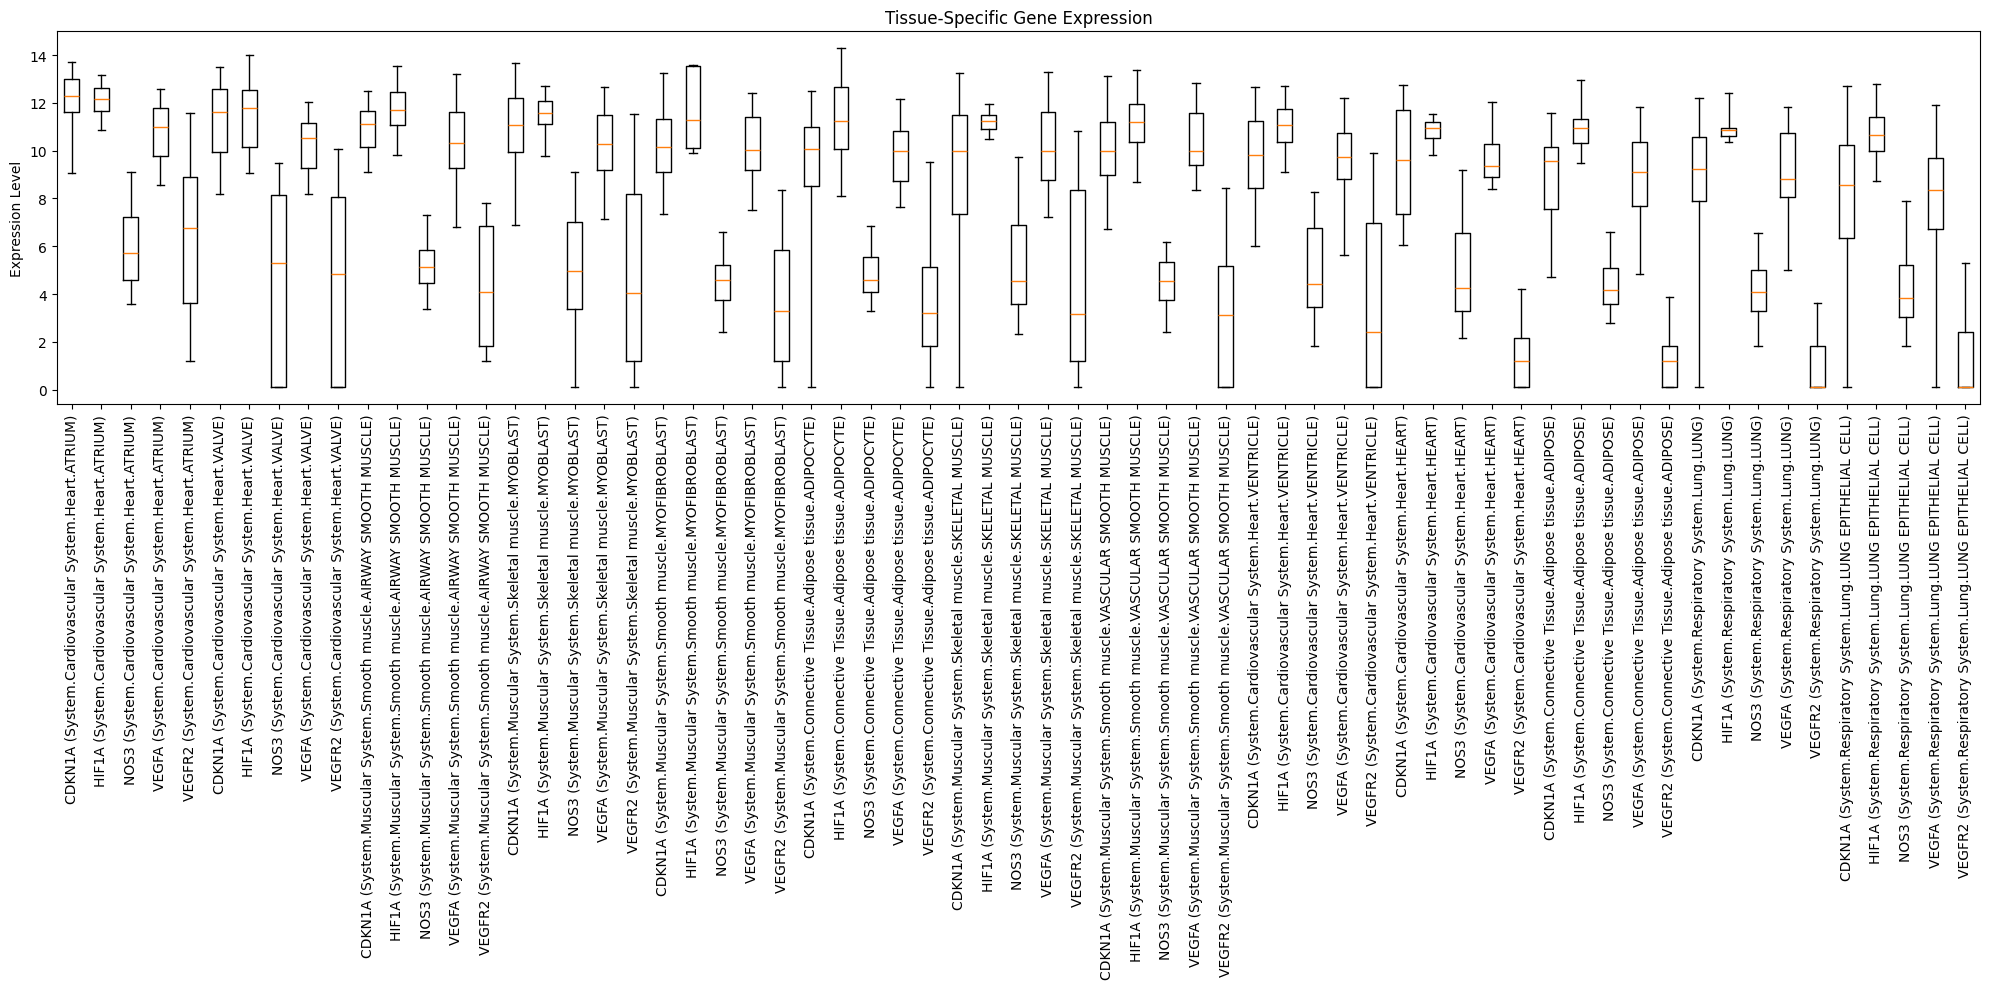

In [ ]:
genes_of_interest = ["VEGFA", "HIF1A", "VEGFR2", "NOS3", "CDKN1A"]
filtered = filtered_df[df_melted["Gene"].isin(genes_of_interest)]


fig, ax = plt.subplots(figsize=(20, 10))


box_data = []
positions = []
labels = []
i = 1

for _, row in filtered.iterrows():
    stats = {
        'med': row["Median"],
        'q1': row["Q1"],
        'q3': row["Q3"],
        'whislo': row["Min"],
        'whishi': row["Max"],
        'fliers': []
    }
    box_data.append(stats)
    positions.append(i)
    labels.append(f"{row['Gene']} ({row['Tissue']})")
    i += 1


ax.bxp(box_data, positions=positions, showfliers=False)
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Expression Level")
ax.set_title("Tissue-Specific Gene Expression")
plt.tight_layout()
plt.show()

Function

In [ ]:

def boxplots (genes_of_interest, df = filtered_df):
  filtered_df = df[df_melted["Gene"].isin(genes_of_interest)]

  fig, ax = plt.subplots(figsize=(20, 10))


  box_data = []
  positions = []
  labels = []
  i = 1

  for _, row in filtered_df.iterrows():
      stats = {
          'med': row["Median"],
          'q1': row["Q1"],
          'q3': row["Q3"],
          'whislo': row["Min"],
          'whishi': row["Max"],
          'fliers': []
      }
      box_data.append(stats)
      positions.append(i)
      labels.append(f"{row['Gene']} ({row['Tissue']})")
      i += 1

  # Plot
  ax.bxp(box_data, positions=positions, showfliers=False)
  ax.set_xticks(positions)
  ax.set_xticklabels(labels, rotation=90)
  ax.set_ylabel("Expression Level")
  ax.set_title("Tissue-Specific Gene Expression")
  plt.tight_layout()
  plt.show()

<ipython-input-13-77162588e250>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df[df_melted["Gene"].isin(genes_of_interest)]


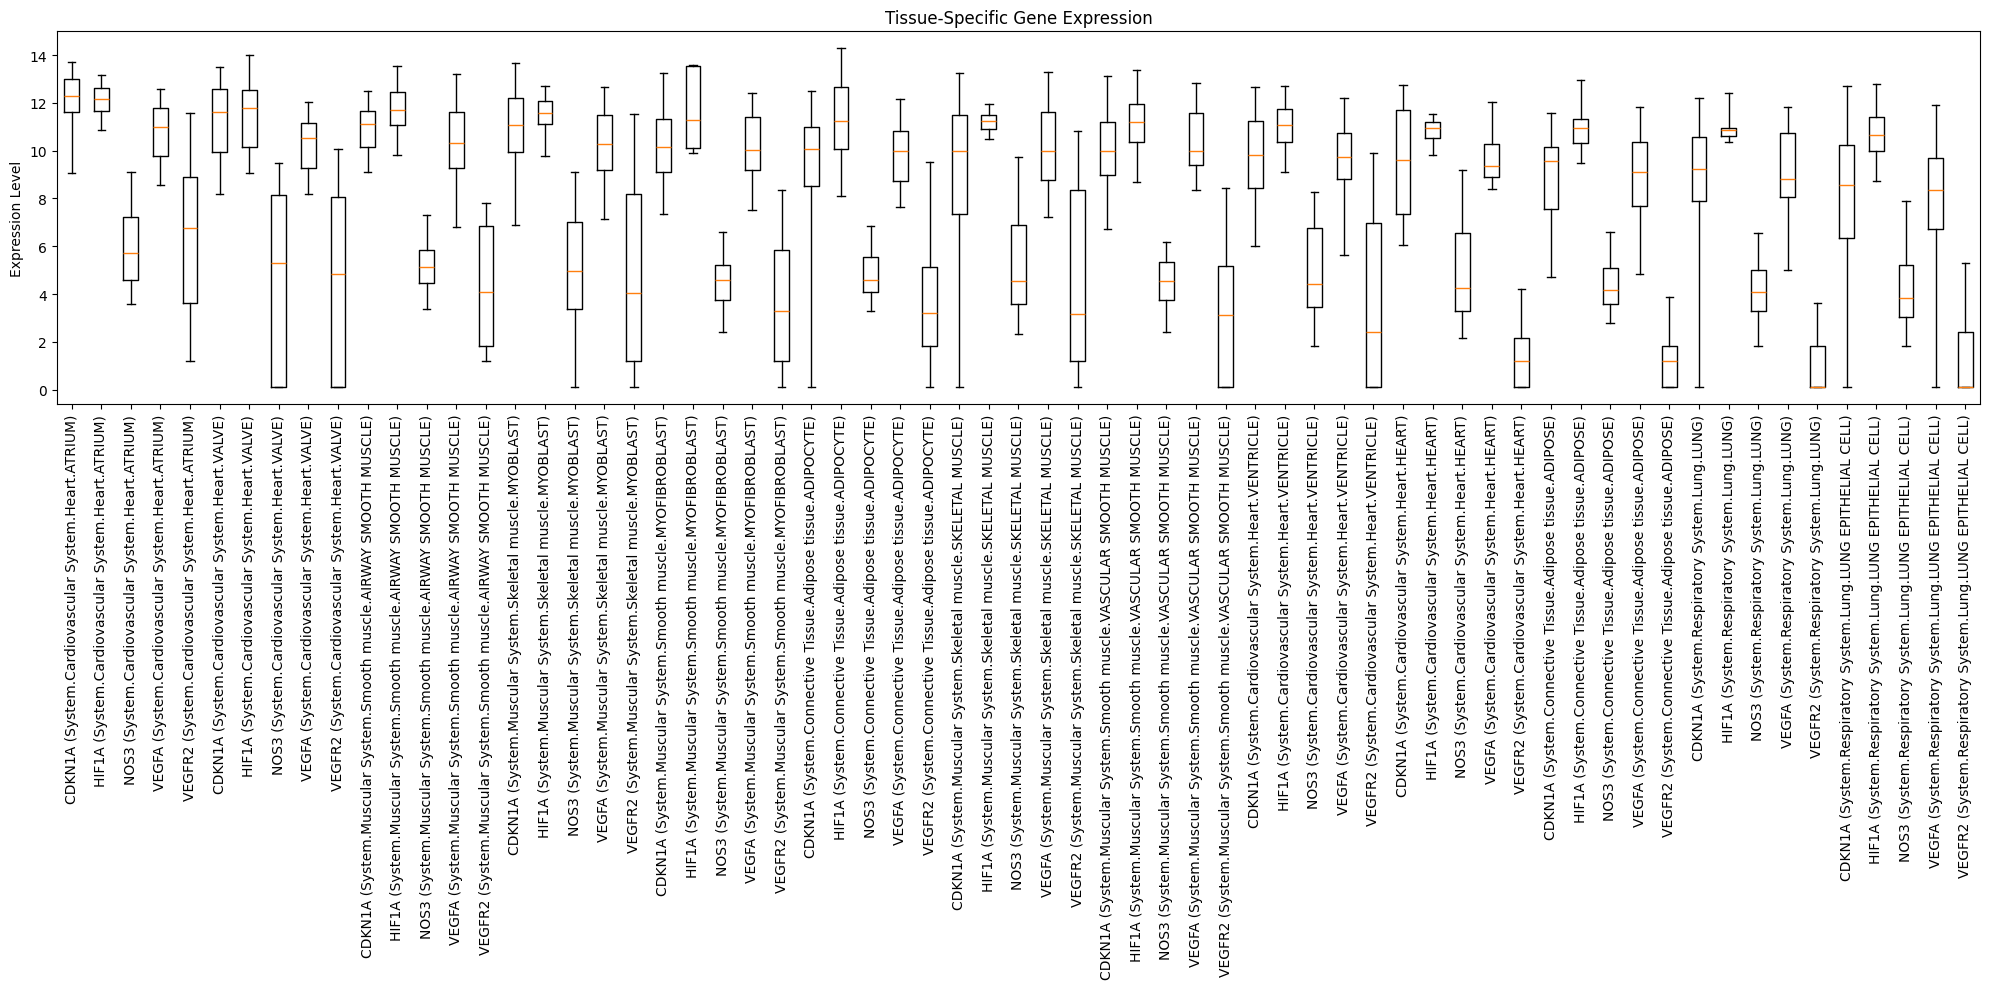

In [ ]:
genes_of_interest = ["VEGFA", "HIF1A", "VEGFR2", "NOS3", "CDKN1A"]  # or use your gene list

boxplots(genes_of_interest)

<ipython-input-13-77162588e250>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df[df_melted["Gene"].isin(genes_of_interest)]


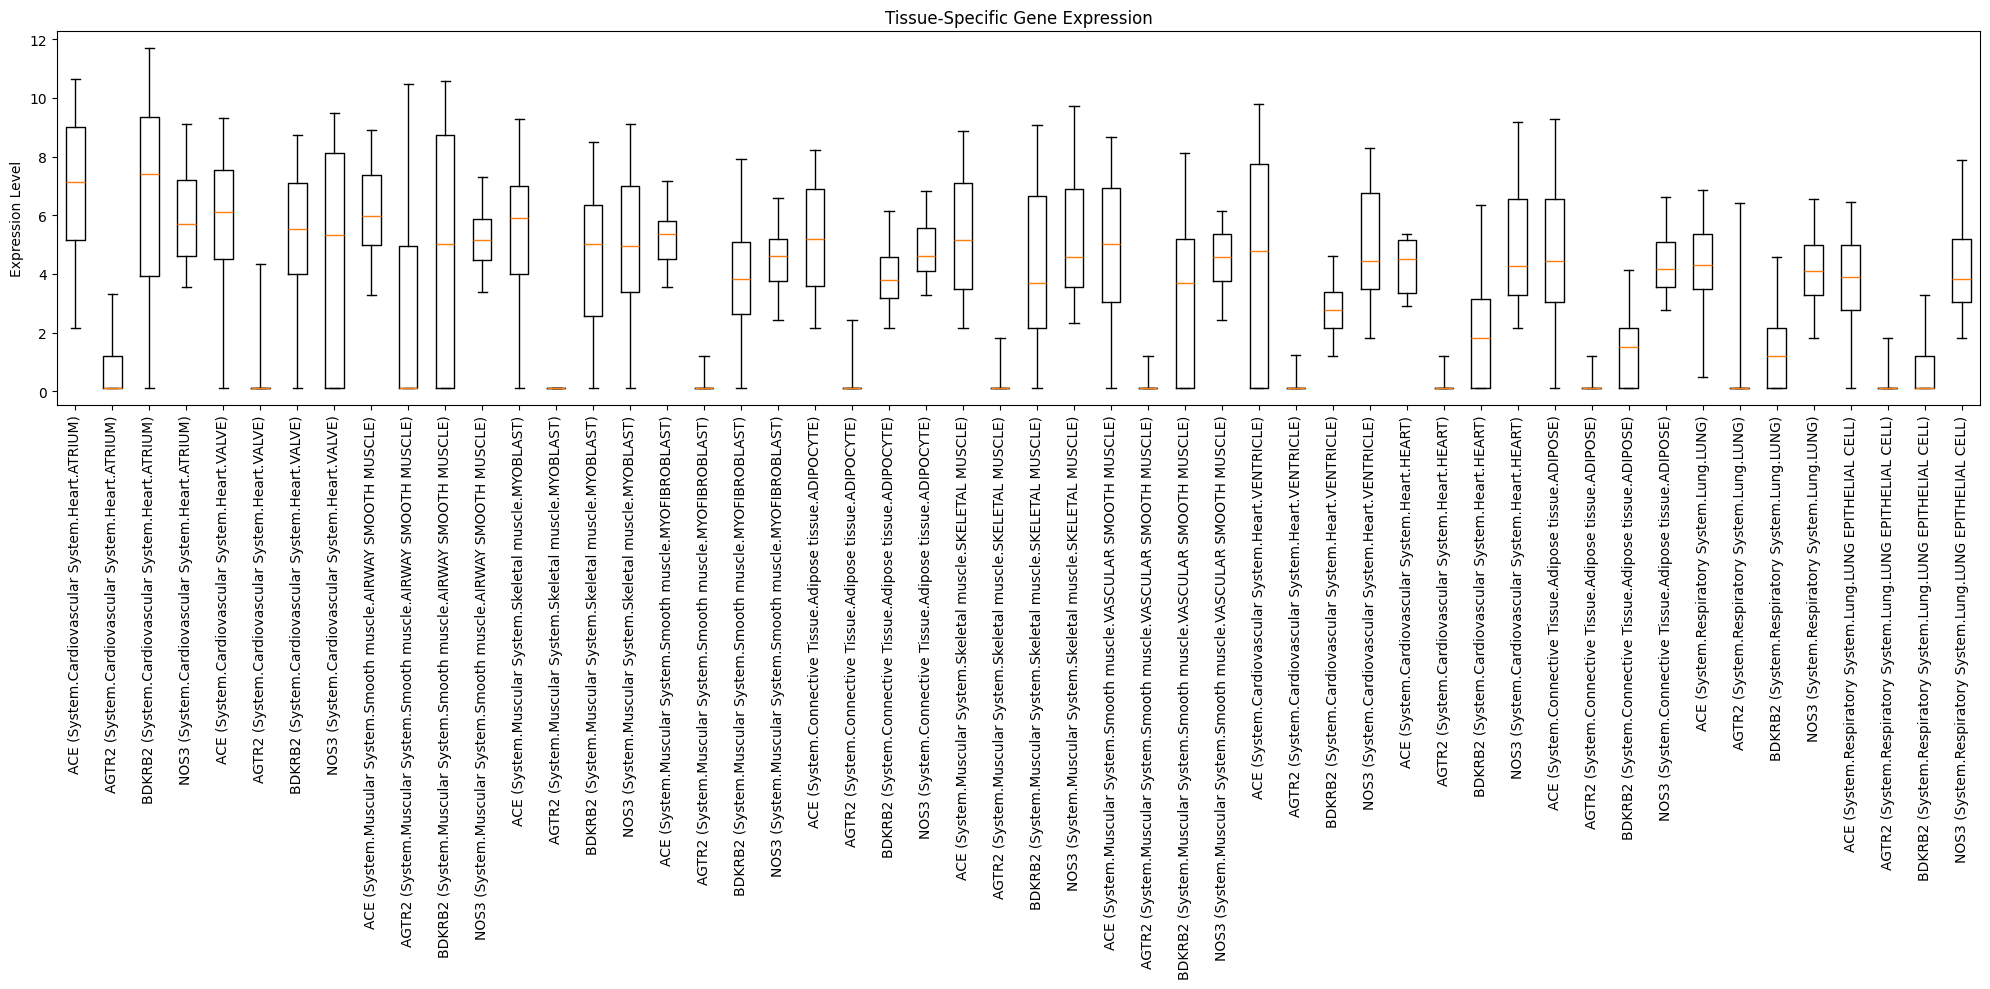

In [ ]:
boxplots(['ACE', 'AGTR2','BDKRB2','NOS3'])

<ipython-input-13-77162588e250>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df[df_melted["Gene"].isin(genes_of_interest)]


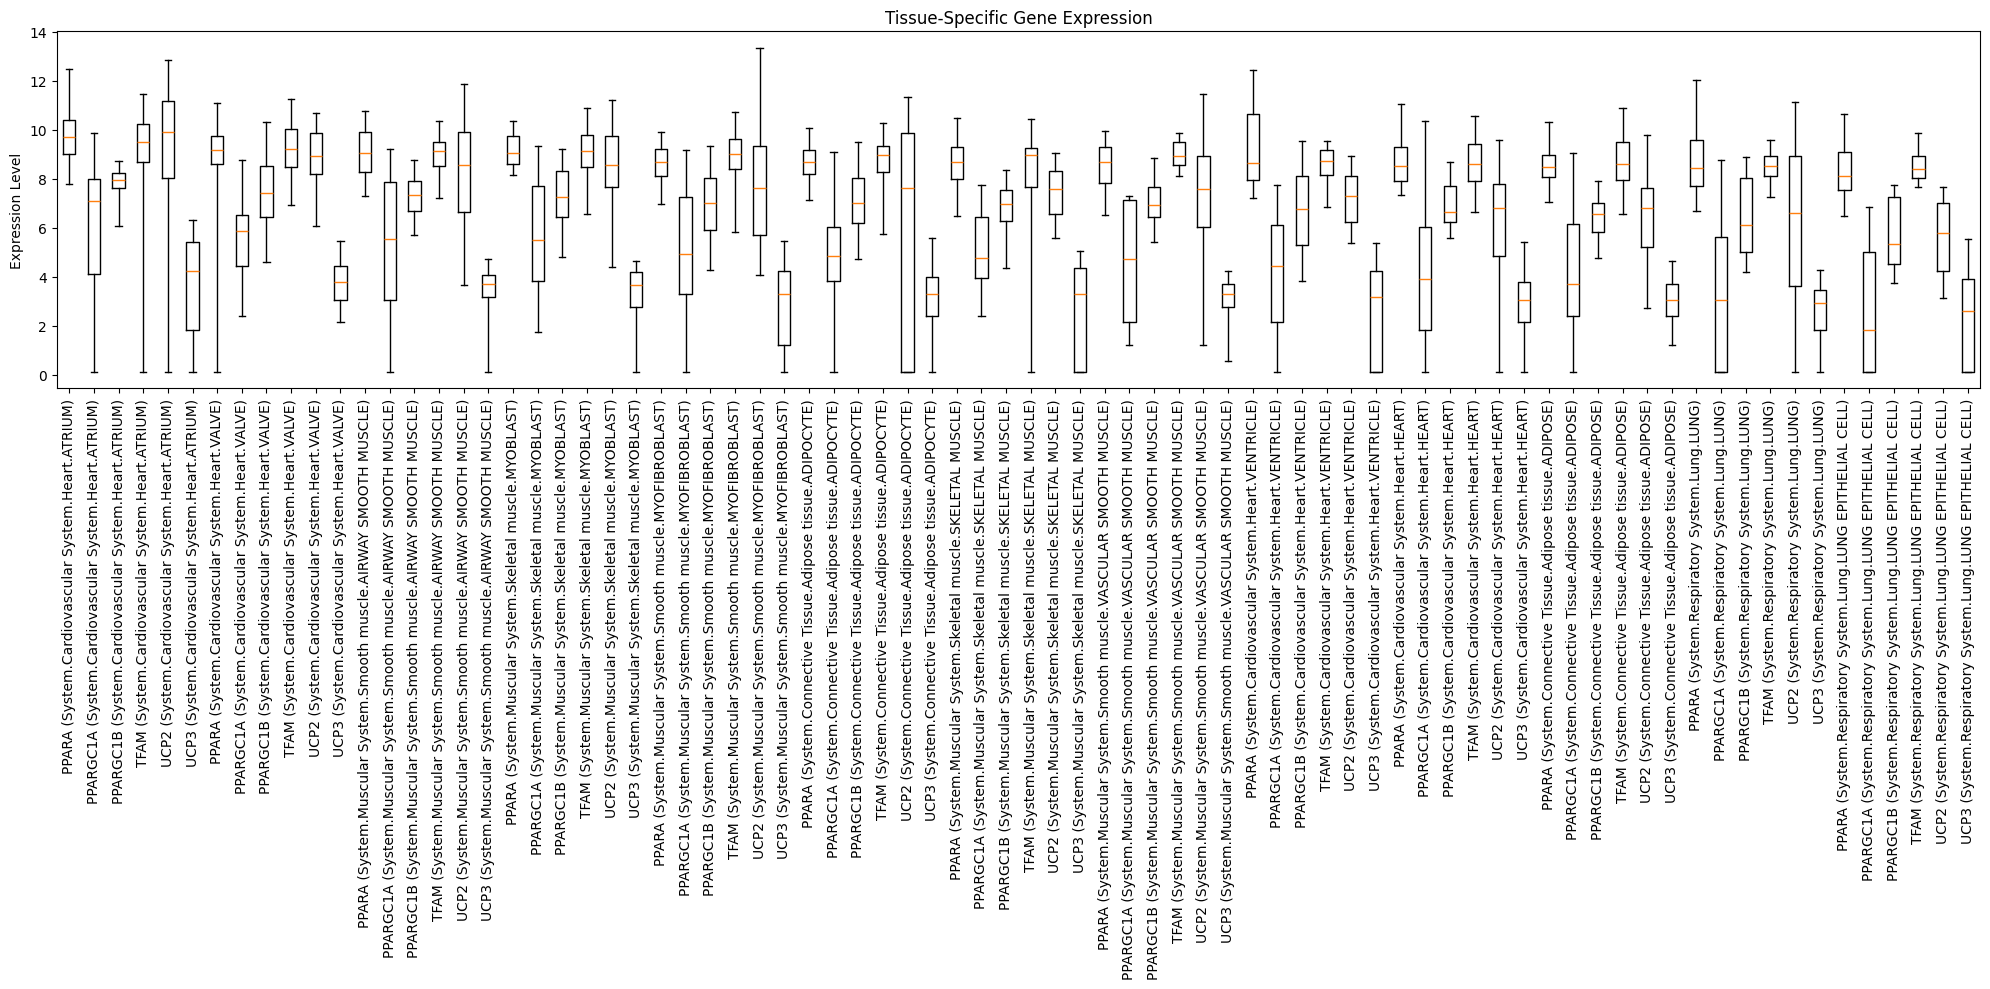

In [ ]:
boxplots(['PPARA', 'PPARGC1A','PPARGC1B','TFAM','UCP2','UCP3'])

<ipython-input-13-77162588e250>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df[df_melted["Gene"].isin(genes_of_interest)]


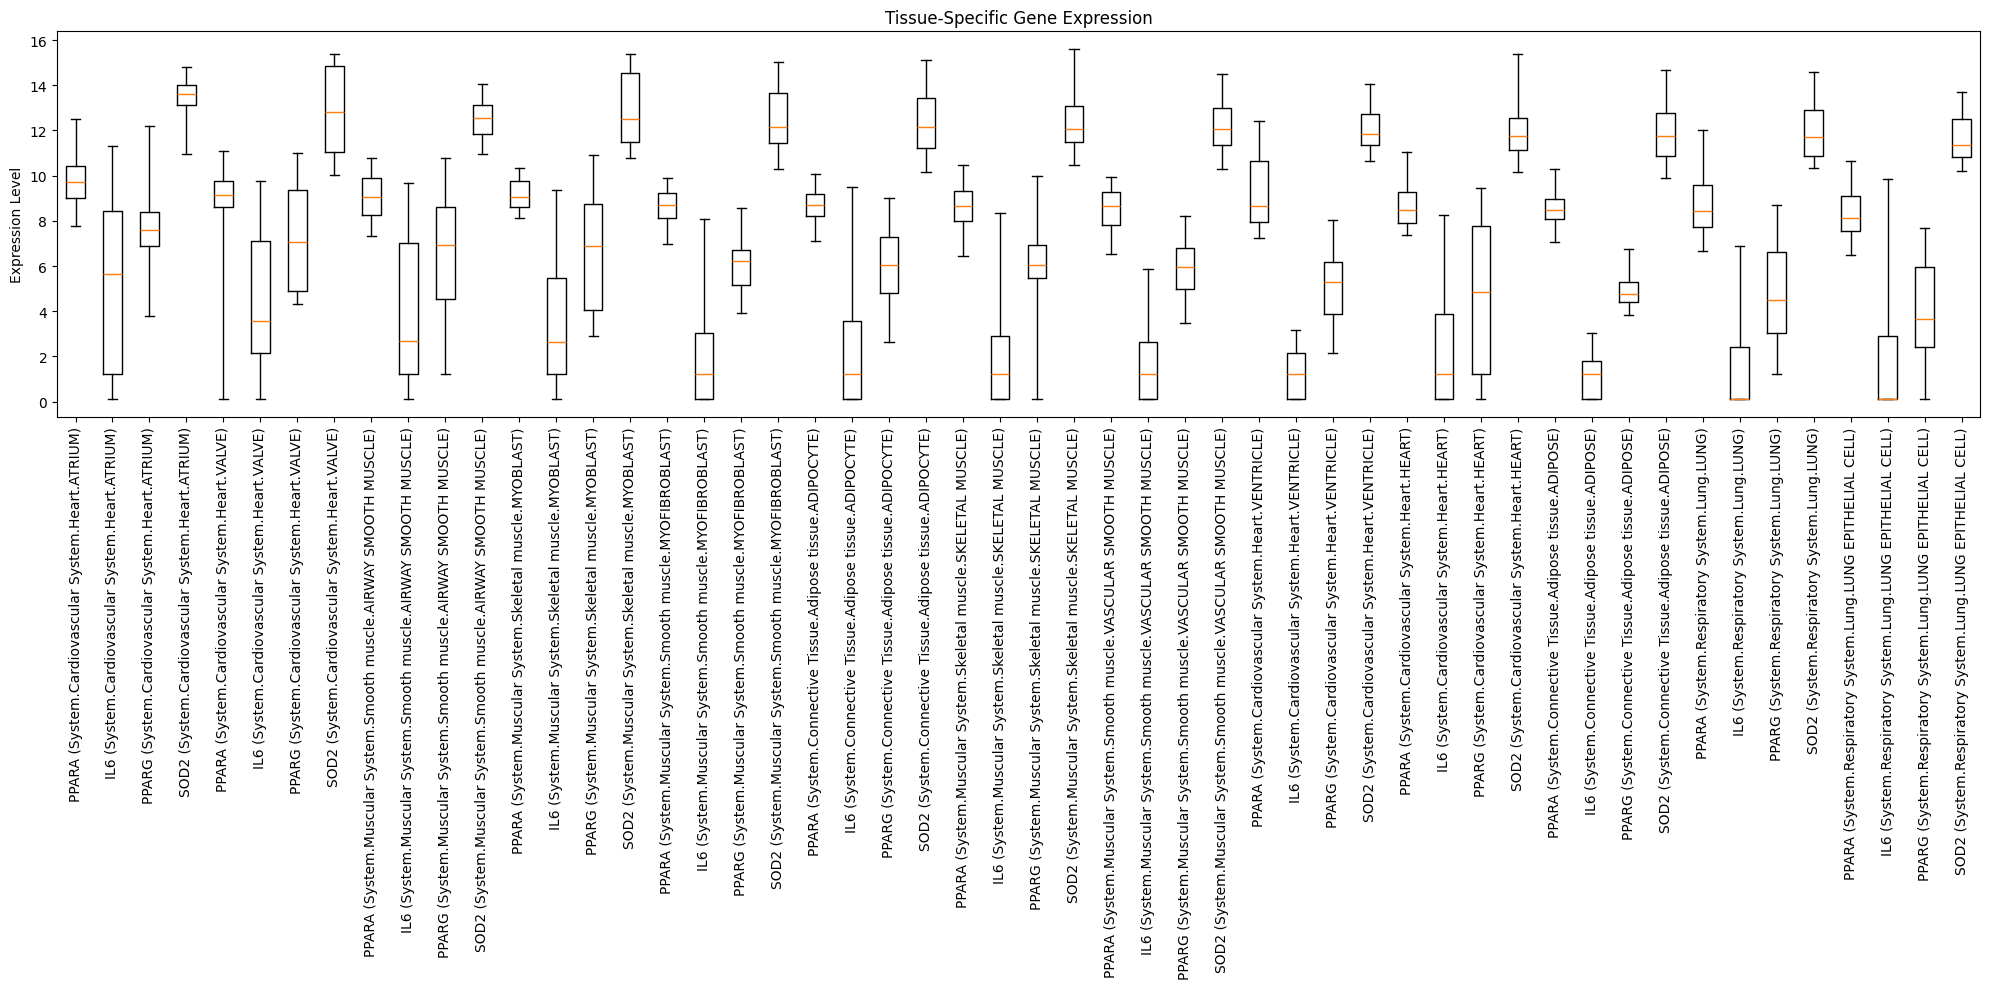

In [ ]:
boxplots(['IL6', 'PPARA','PPARG','SOD2'])

<ipython-input-13-77162588e250>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df[df_melted["Gene"].isin(genes_of_interest)]


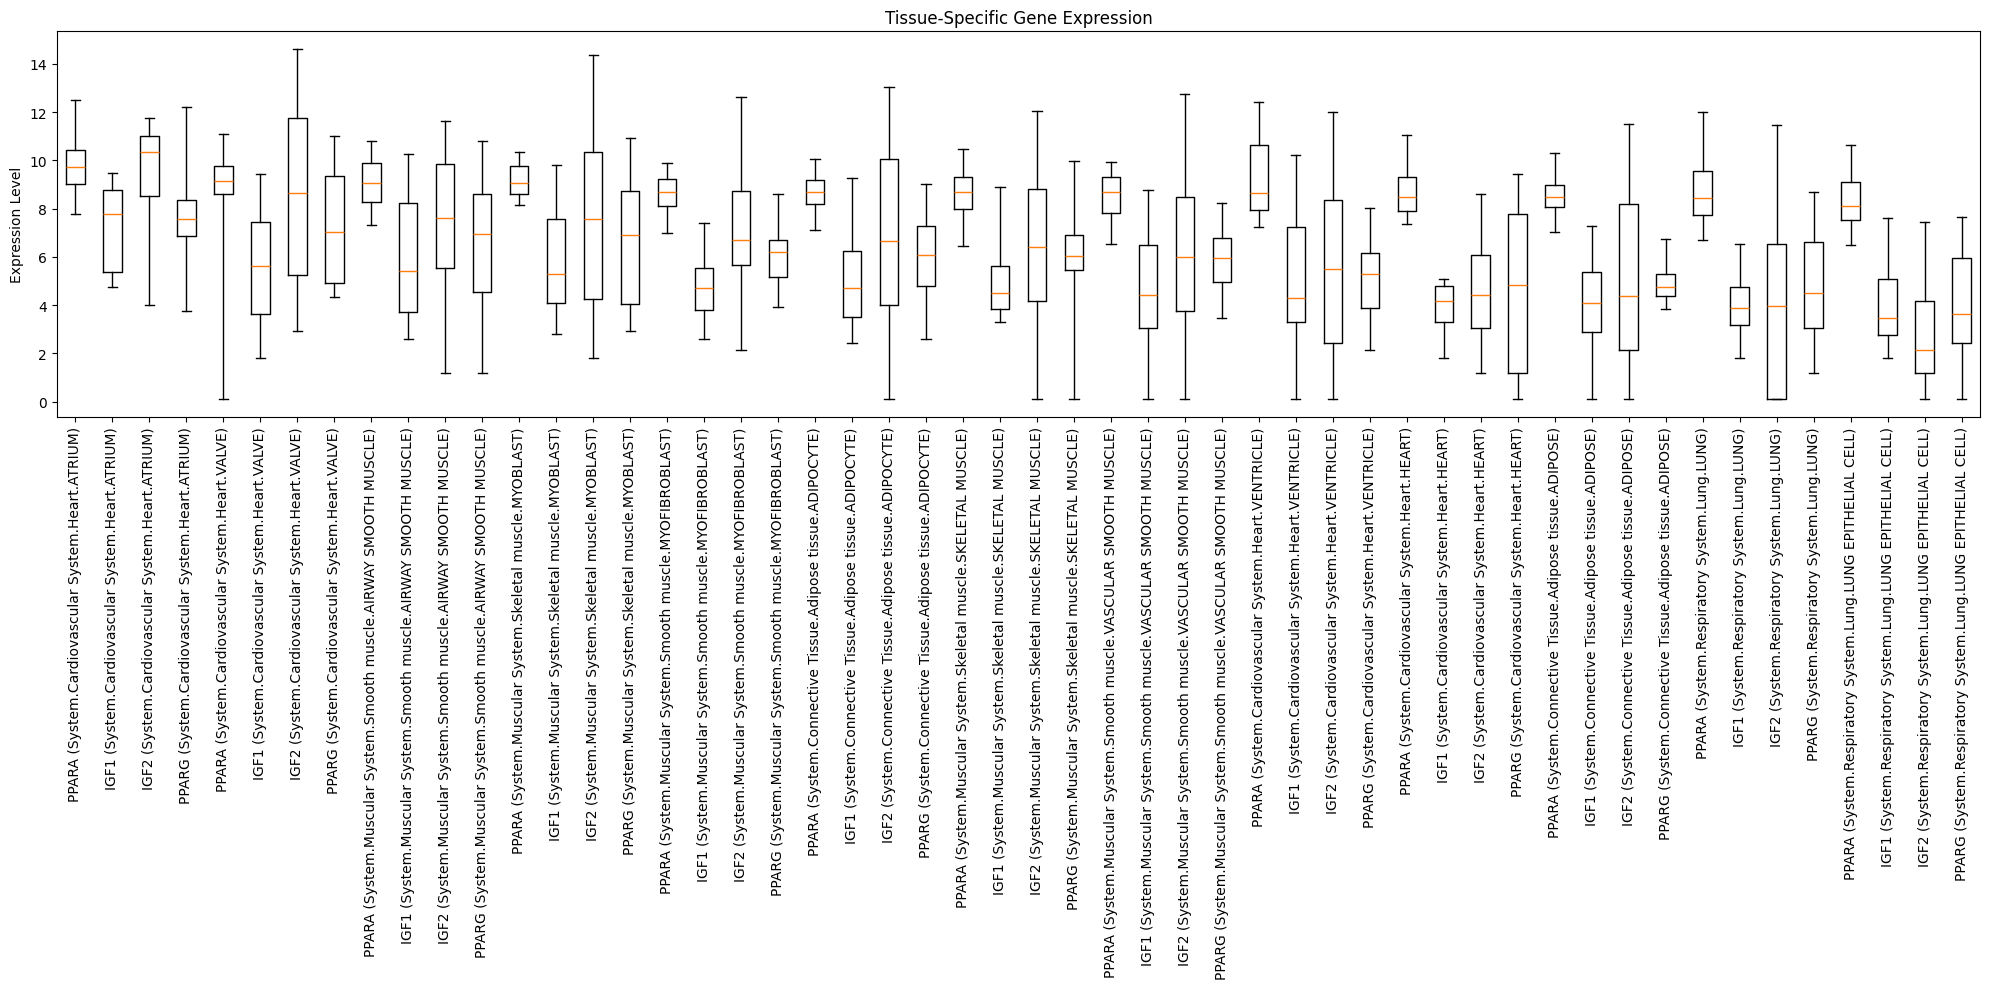

In [ ]:
boxplots(['IGF1', 'PPARA','PPARG','IGF2'])

<ipython-input-13-77162588e250>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df[df_melted["Gene"].isin(genes_of_interest)]


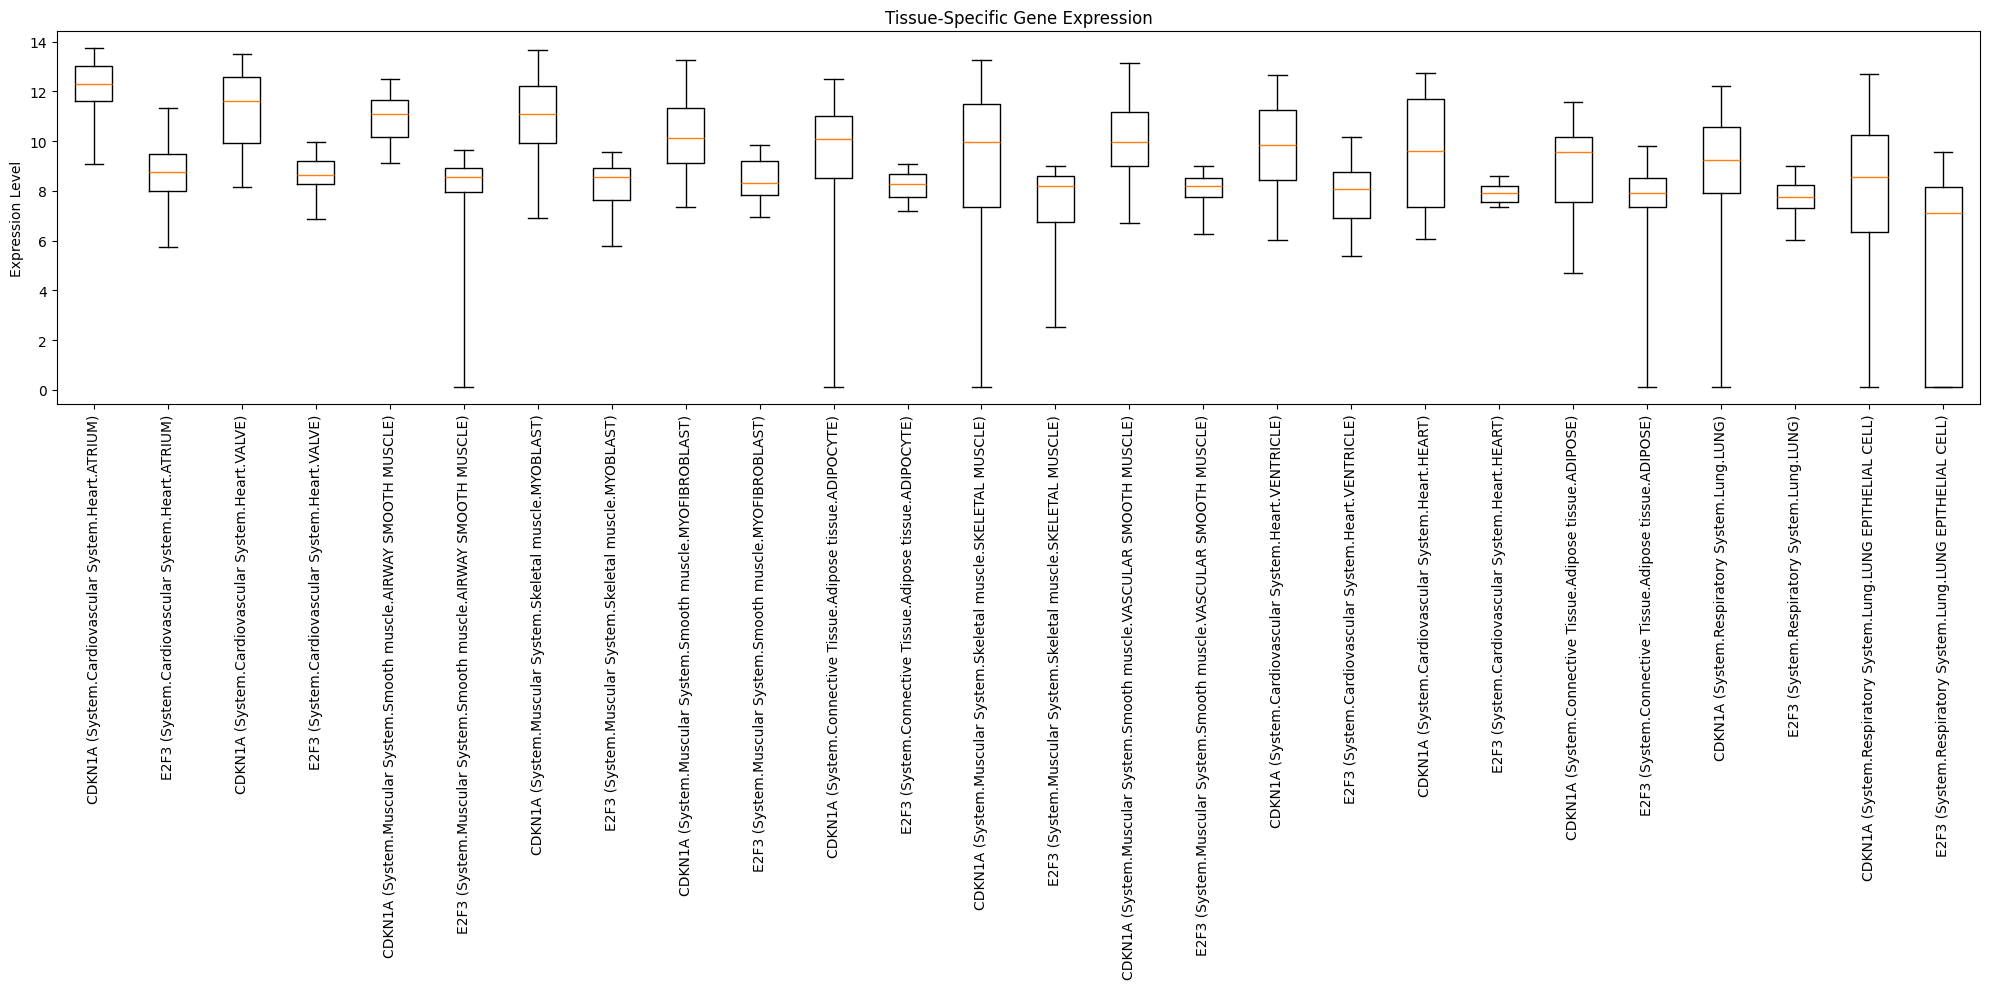

In [ ]:
boxplots(['CDKN1A', 'E2F3'])

<ipython-input-13-77162588e250>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df[df_melted["Gene"].isin(genes_of_interest)]


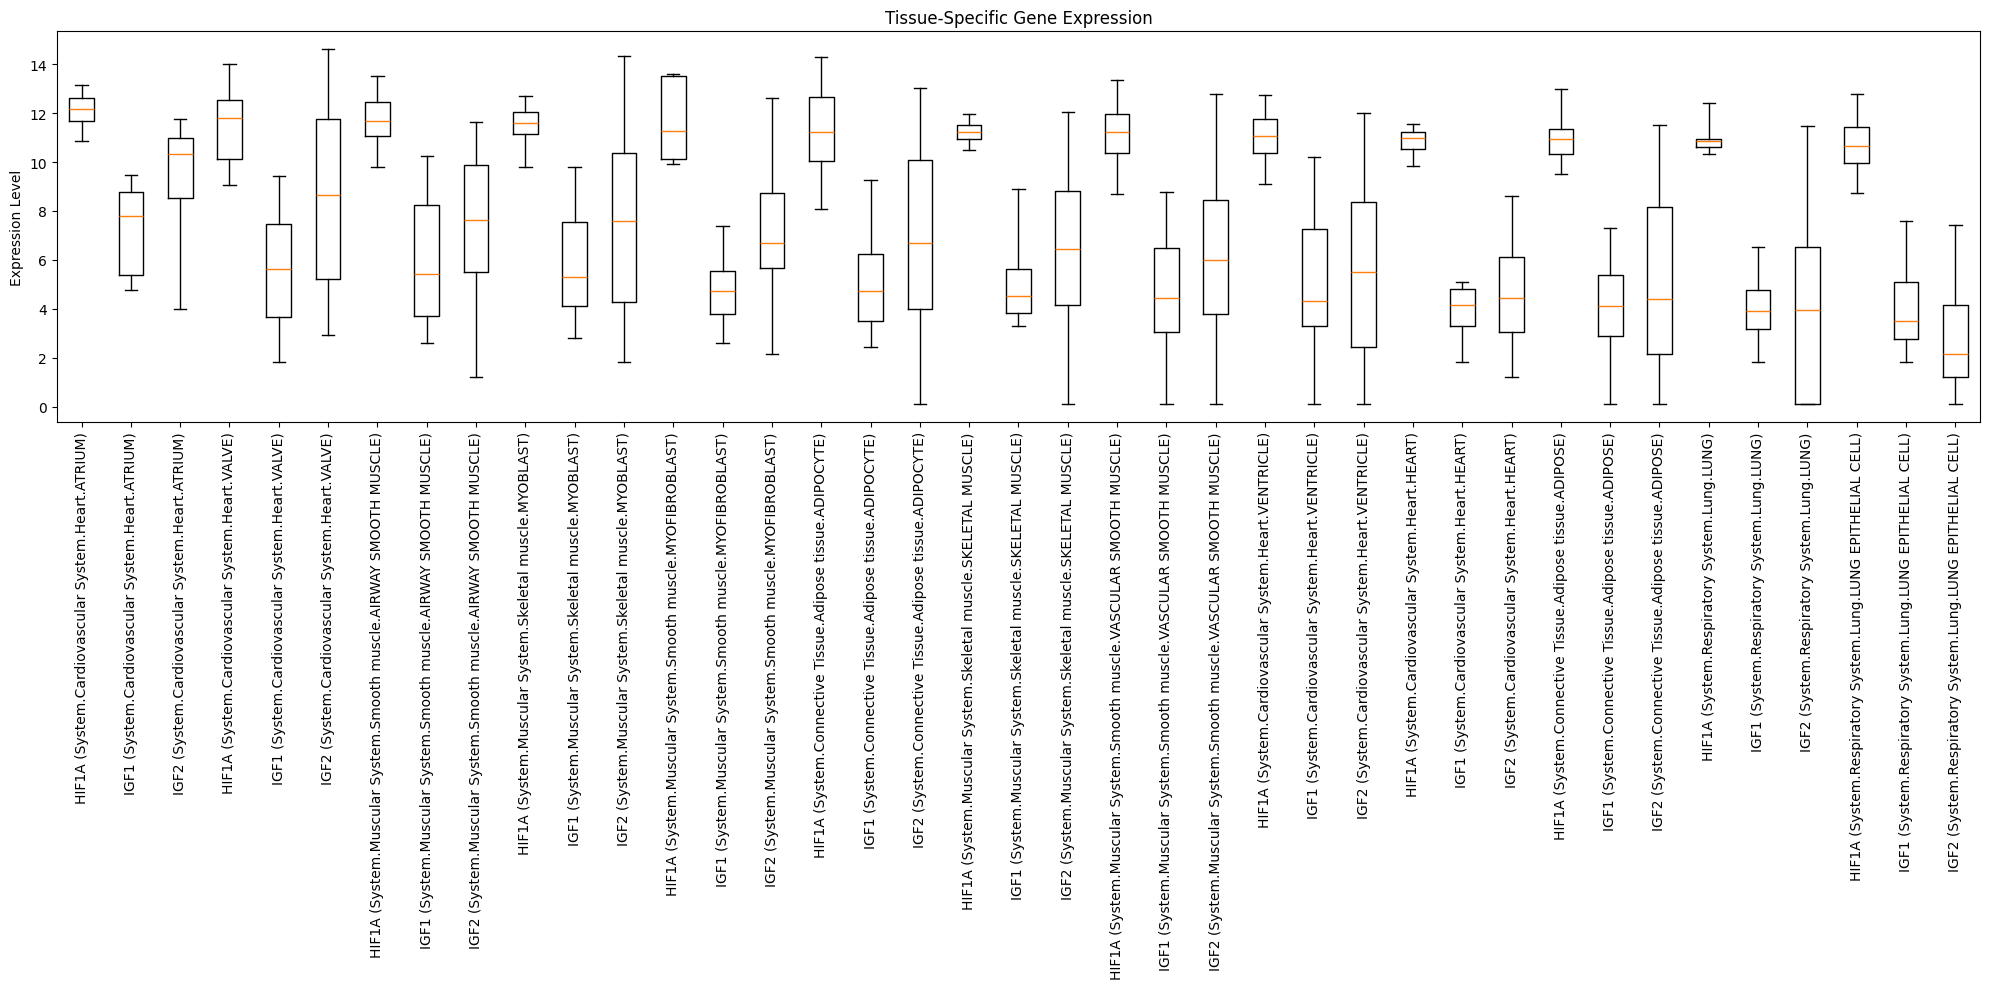

In [ ]:
boxplots(['HIF1A','IGF1','IGF2'])

<ipython-input-13-77162588e250>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df[df_melted["Gene"].isin(genes_of_interest)]


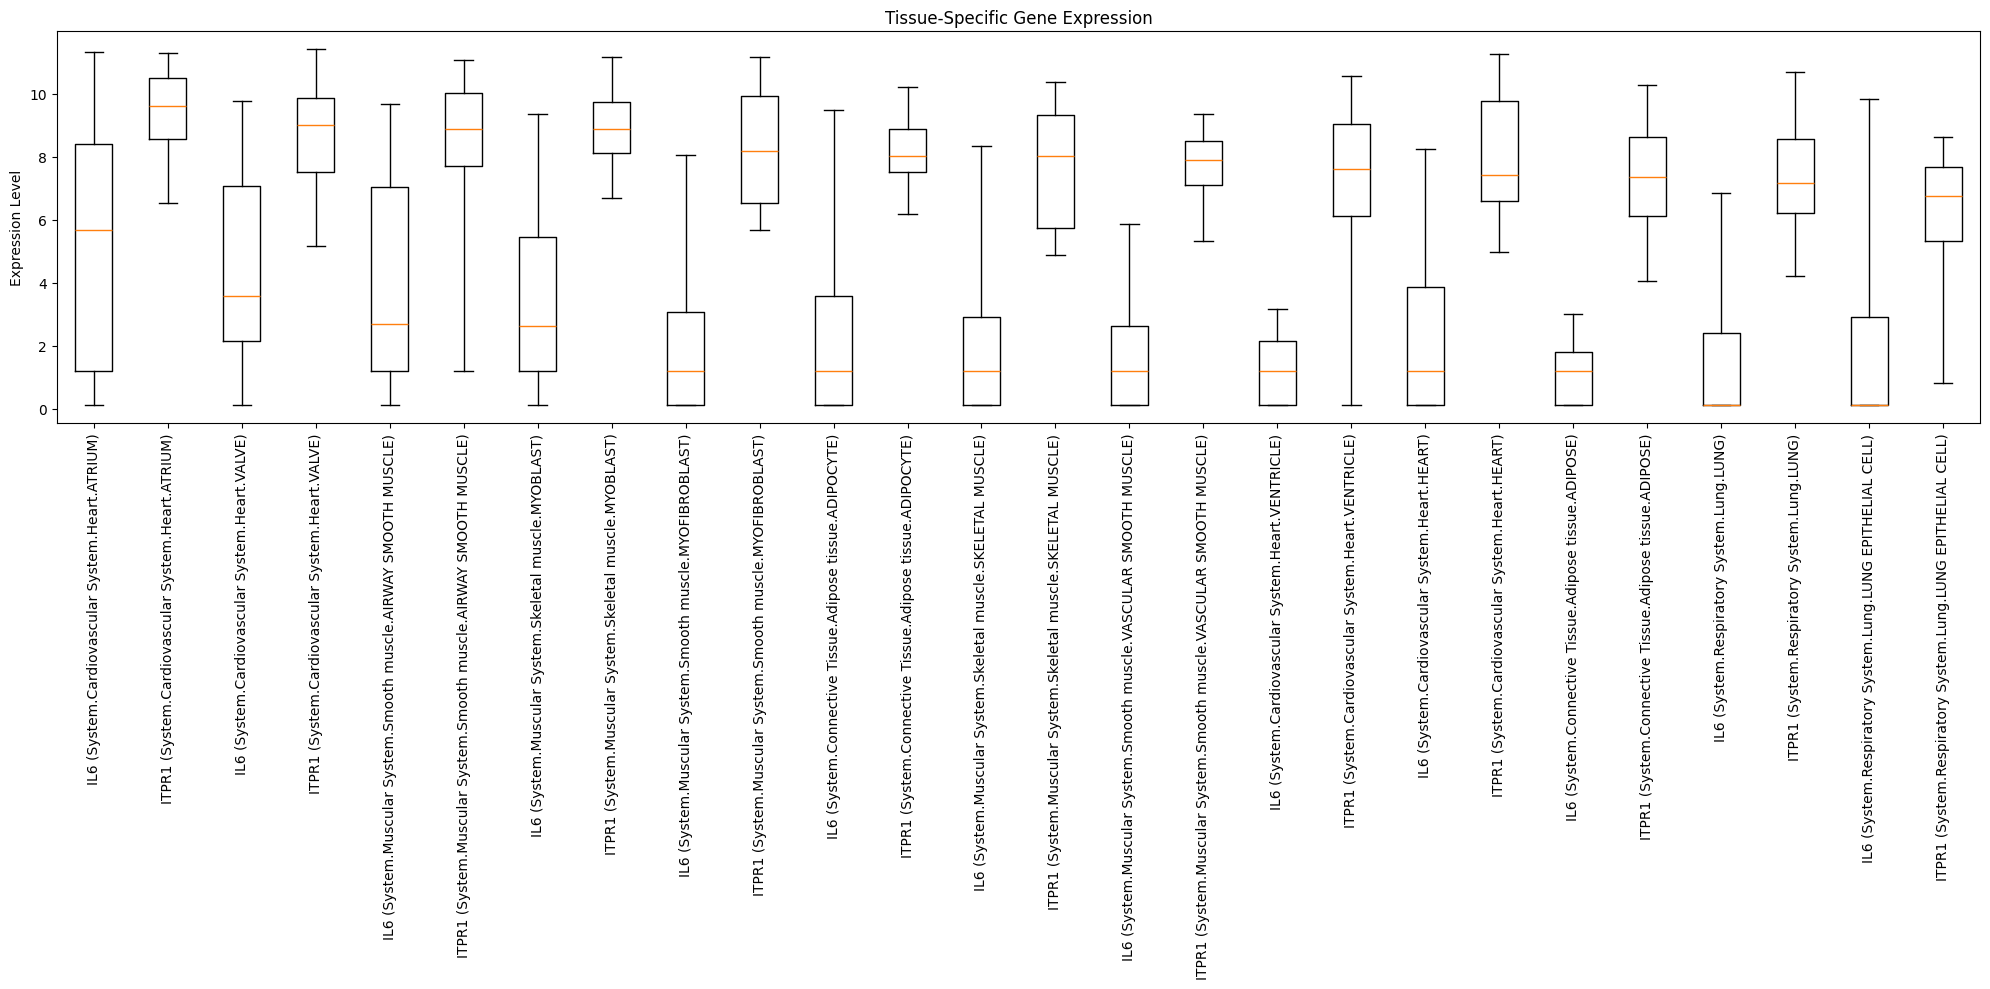

In [ ]:
boxplots(['IL6', 'ITPR1'])

<ipython-input-13-77162588e250>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df[df_melted["Gene"].isin(genes_of_interest)]


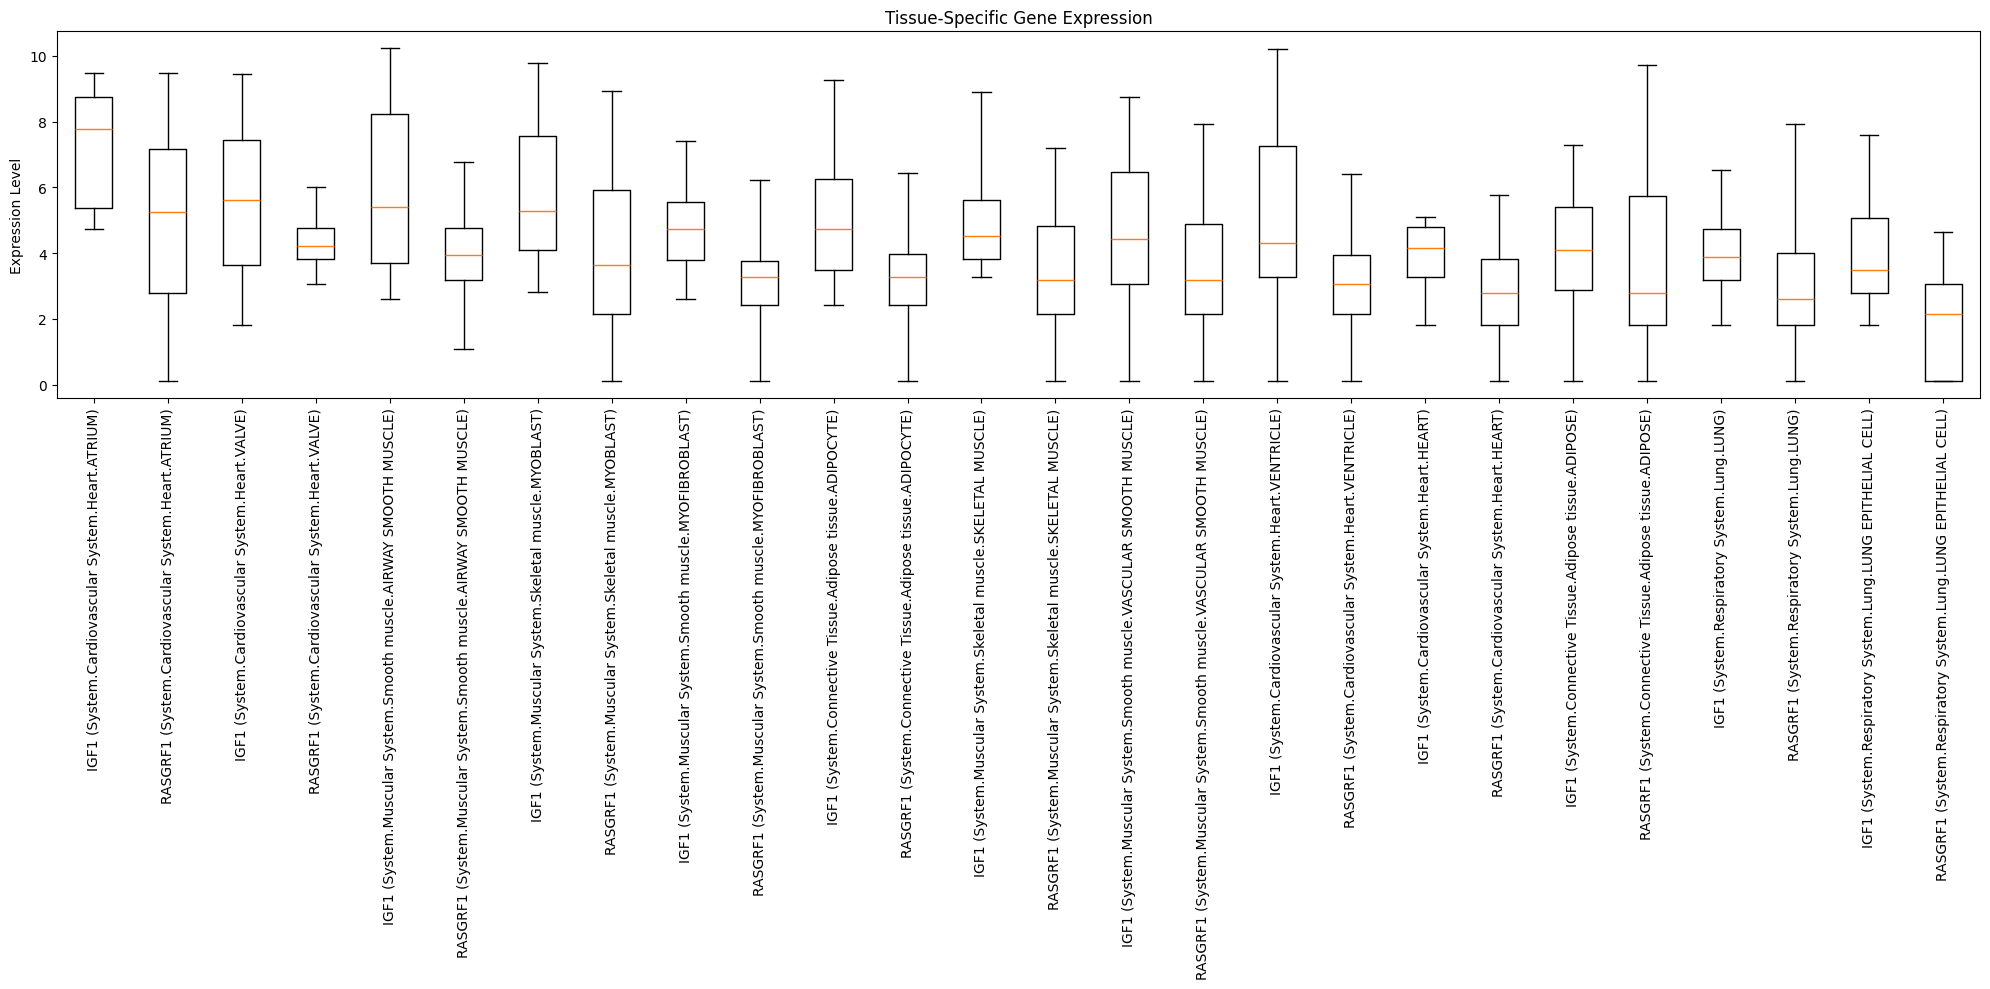

In [ ]:
boxplots(['IGF1','RASGRF1'])